In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

In [3]:
import sys, os

dir = os.path.dirname
sys.path.append(dir(os.getcwd()))

import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vis
import src.utils.folder_tb as fo

In [57]:
path = fo.path_to_folder(2,"data")

main = pd.read_csv(path + "Nutritional_values.csv")
main = md.nutrition_prep(main)
main.head()

,protein,water,fiber,vitamin_a,thiamin,riboflavin,niacin,vitamin_b6,vitamin_b12,folate,vitamin_c,calcium,irom,magnesium,potassium,sodium,zink
name,,,,,,,,,,,,,,,,,
Cornstarch,0.26,0.00832,0.9,0.0,0.000,0.000,0.000,0.000,0.00,0.0,0.0,2.0,0.47,3.0,3.0,9.0,0.06
"Nuts, pecans",9.17,0.00352,9.6,16.8,0.660,0.130,1.167,0.210,0.00,22.0,1.1,70.0,2.53,121.0,410.0,0.0,4.53
"Eggplant, raw",0.98,0.09230,3.0,6.9,0.039,0.037,0.649,0.084,0.00,22.0,2.2,9.0,0.23,14.0,229.0,2.0,0.16
"Teff, uncooked",13.30,0.00882,8.0,2.7,0.390,0.270,3.363,0.482,0.00,0.0,0.0,180.0,7.63,184.0,427.0,12.0,3.63
"Sherbet, orange",1.10,0.06610,1.3,13.8,0.027,0.097,0.063,0.023,0.13,4.0,2.3,54.0,0.14,8.0,96.0,46.0,0.48


In [58]:
test = pd.read_csv(path + "Nutritional_values.csv")
test = test.set_index("name")
test = test.drop("Unnamed: 0", axis = 1)
test = test.drop("serving_size", axis = 1)
test = md.mapper(test)
test.head()

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


<AxesSubplot:xlabel='protein', ylabel='saturated_fat'>

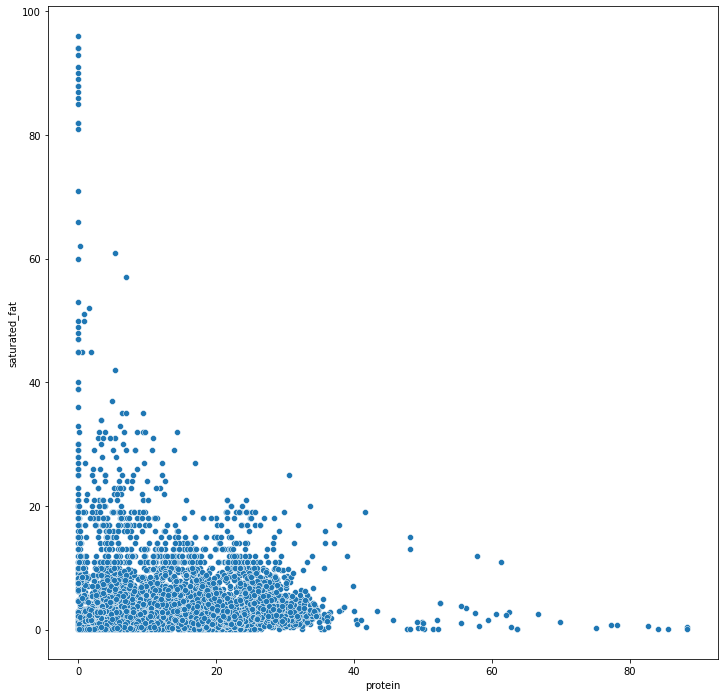

In [59]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = test, x = "protein", y = "saturated_fat")

In [60]:
test[(test["saturated_fat"] > 20) & (test["protein"] < 5)].sort_values(by = "saturated_fat", ascending = False)

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Fish oil, fully hydrogenated, menhaden",902.0,100.0,96.0,500.0,0.0,0.0,0.0,0.0,0.000,0.000,...,100.00,95.600,0.000,0.000,500.0,0.0,0.00,0.0,0.0,0.00
"Oil, uses similar to 95 degree hard butter, confection fat, palm kernel (hydrogenated), industrial",884.0,100.0,94.0,0.0,6.0,0.2,0.0,0.0,0.000,0.000,...,100.00,93.701,0.257,0.000,0.0,0.0,0.01,0.0,0.0,0.05
"Oil, fully hydrogenated, cottonseed, industrial",884.0,100.0,94.0,0.0,0.0,0.2,0.0,0.0,0.000,0.000,...,100.00,93.608,1.529,0.587,0.0,0.0,0.00,0.0,0.0,0.00
"Oil, fully hydrogenated, soy, industrial",884.0,100.0,94.0,0.0,0.0,0.2,0.0,0.0,0.000,0.000,...,100.00,93.966,1.341,0.383,0.0,0.0,0.00,0.0,0.0,0.00
"Oil, used for whipped toppings and coffee whiteners, coconut (hydrogenated), industrial",880.0,100.0,94.0,0.0,7.0,0.3,0.0,0.0,0.000,0.000,...,99.50,93.536,0.267,0.000,0.0,0.0,0.01,0.0,0.0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nuts, raw (liquid expressed from grated meat and water), coconut milk",230.0,24.0,21.0,0.0,15.0,8.5,16.0,0.0,0.760,0.183,...,23.84,21.140,1.014,0.261,0.0,0.0,0.72,0.0,0.0,67.62
"Candies, prepared-from-recipe, toffee",560.0,33.0,21.0,104.0,135.0,0.0,2.0,0.0,0.029,0.134,...,32.75,20.565,8.964,1.222,104.0,0.0,0.66,0.0,0.0,0.55
"Oil, teaseed",884.0,100.0,21.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,100.00,21.100,51.500,23.000,0.0,0.0,0.00,0.0,0.0,0.00


In [61]:
test["protein"].sort_values(ascending = False).head(60)

name
Soy protein isolate                                                                                           88.32
Soy protein isolate, potassium type                                                                           88.32
Gelatins, unsweetened, dry powder                                                                             85.60
Egg, glucose reduced, stabilized, dried, white                                                                84.08
Seal, dried (Alaska Native), meat, bearded (Oogruk)                                                           82.60
Egg, glucose reduced, stabilized, powder, dried, white                                                        82.40
Egg, dried, white                                                                                             81.10
Beverages, Protein powder whey based                                                                          78.13
Steelhead trout, flesh (Shoshone Bannock), dried                   

In [62]:
isolate = test.index.str.contains("isolate")
powder = test.index.str.contains("powder")
stabilized = test.index.str.contains("stabilized")
whey = test.index.str.contains("whey")
concentrate = test.index.str.contains("concentrate")
supplement = test.index.str.contains("supplement")

filter_ = [isolate, powder, stabilized, whey, concentrate, supplement]

In [63]:
test2 = test[(isolate == False) & (powder == False) & (stabilized == False) & (whey == False) & (concentrate == False) & (supplement == False)]

print(test.shape)
print(test2.shape)

(8789, 74)
(8579, 74)


In [64]:
test2["protein"].sort_values(ascending = False).head(60)

name
Seal, dried (Alaska Native), meat, bearded (Oogruk)                                                           82.60
Egg, dried, white                                                                                             81.10
Steelhead trout, flesh (Shoshone Bannock), dried                                                              77.27
Vital wheat gluten                                                                                            75.16
Whale, dried (Alaska Native), meat, beluga                                                                    69.86
Fish, dried and salted, Atlantic, cod                                                                         62.82
Fish, dried (Alaska Native), whitefish                                                                        62.44
Seal, partially dried (Alaska Native), meat, bearded (Oogruk)                                                 62.38
Fish, dried (Alaska Native), chum, salmon                          

In [65]:
egg = test2.index.str.contains("egg") + test2.index.str.contains("Egg")
meat = test2.index.str.contains("meat") + test2.index.str.contains("Meat")
chicken = test2.index.str.contains("chicken") + test2.index.str.contains("Chicken")
fish = test2.index.str.contains("fish") + test2.index.str.contains("Fish")
beef = test2.index.str.contains("beef") + test2.index.str.contains("Beef")
pork = test2.index.str.contains("pork") + test2.index.str.contains("Pork")
cheese = test2.index.str.contains("cheese") + test2.index.str.contains("Cheese")

tofu = test2.index.str.contains("tofu") + test2.index.str.contains("Tofu")
soybeans = test2.index.str.contains("soybeans") + test2.index.str.contains("Soybeans")
seitan = test2.index.str.contains("seitan") + test2.index.str.contains("Seitan")
tempeh = test2.index.str.contains("tempeh") + test2.index.str.contains("Tempeh")
lentil = test2.index.str.contains("lentil") + test2.index.str.contains("lentils")
hempseed = test2.index.str.contains("hempseed") + test2.index.str.contains("Hempseed")
quinoa = test2.index.str.contains("quinoa") + test2.index.str.contains("Quinoa")
nuts = test2.index.str.contains("nuts") + test2.index.str.contains("Nuts")

filter_2 = [egg, meat, chicken, fish, beef, pork, cheese, tofu, soybeans, seitan, tempeh, lentil, hempseed, quinoa, nuts]
#test3 = test2[(egg) | (meat) | (chicken) | (fish) | (beef) | (pork) | (cheese) | (tofu) | (soybeans) | (seitan) | (tempeh) | (lentil) | (hempseed) | (quinoa) | (nuts)]

In [121]:
test3 = test2

test3["veg"] = None
test3["veg_or_an"] = None

test3.loc[(egg) | (meat) | (chicken) | (fish) | (beef) | (pork) | (cheese), "veg"] = 0

test3.loc[egg, "veg_or_an"] = "egg"
test3.loc[meat, "veg_or_an"] = "meat"
test3.loc[chicken, "veg_or_an"] = "chicken"
test3.loc[fish, "veg_or_an"] = "fish"
test3.loc[beef, "veg_or_an"] = "beef"
test3.loc[pork, "veg_or_an"] = "pork"
test3.loc[cheese, "veg_or_an"] = "cheese"

test3.loc[(tofu) | (soybeans) | (seitan) | (tempeh) | (lentil) | (hempseed) | (quinoa) | (nuts), "veg"] = 1

test3.loc[tofu, "veg_or_an"] = "tofu"
test3.loc[soybeans, "veg_or_an"] = "soybeans"
test3.loc[seitan, "veg_or_an"] = "seitan"
test3.loc[tempeh, "veg_or_an"] = "tempeh"
test3.loc[lentil, "veg_or_an"] = "lentil"
test3.loc[hempseed, "veg_or_an"] = "hempseed"
test3.loc[quinoa, "veg_or_an"] = "quinoa"
test3.loc[quinoa, "veg_or_an"] = "quinoa"
test3.loc[nuts, "veg_or_an"] = "nuts"

test3 = test3[(egg) | (meat) | (chicken) | (fish) | (beef) | (pork) | (cheese) | (tofu) | (soybeans) | (seitan) | (tempeh) | (lentil) | (hempseed) | (quinoa) | (nuts)]

print(test3.shape)

test3.sort_values(by = "protein", ascending = False).head(5)

(3165, 76)
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,veg_or_an,veg
name,,,,,,,,,,,,,,,,,,,,,
"Seal, dried (Alaska Native), meat, bearded (Oogruk)",351.0,2.3,0.6,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,1.330,0.370,0.0,0.0,3.50,0.0,0.0,11.60,meat,0
"Egg, dried, white",382.0,0.0,NaN,0.0,1280.0,8.4,18.0,0.0,0.865,0.775,...,0.000,0.000,0.0,0.0,5.30,0.0,0.0,5.80,egg,0
"Whale, dried (Alaska Native), meat, beluga",327.0,5.3,1.2,122.0,220.0,131.7,10.0,0.0,15.200,1.680,...,3.345,0.319,122.0,0.0,2.69,0.0,0.0,22.39,meat,0
"Fish, dried and salted, Atlantic, cod",290.0,2.4,0.5,152.0,7027.0,291.3,25.0,0.0,7.500,1.675,...,0.342,0.804,152.0,0.0,18.67,0.0,0.0,16.14,fish,0
"Fish, dried (Alaska Native), whitefish",371.0,13.0,2.9,266.0,200.0,205.6,11.0,0.0,11.200,2.570,...,4.380,2.160,266.0,0.0,5.57,0.0,0.0,20.59,fish,0


In [108]:
#test4 = test3[(test3["veg_or_an"] == 1) | (test3["veg_or_an"] == -1)]

<AxesSubplot:xlabel='protein', ylabel='saturated_fat'>

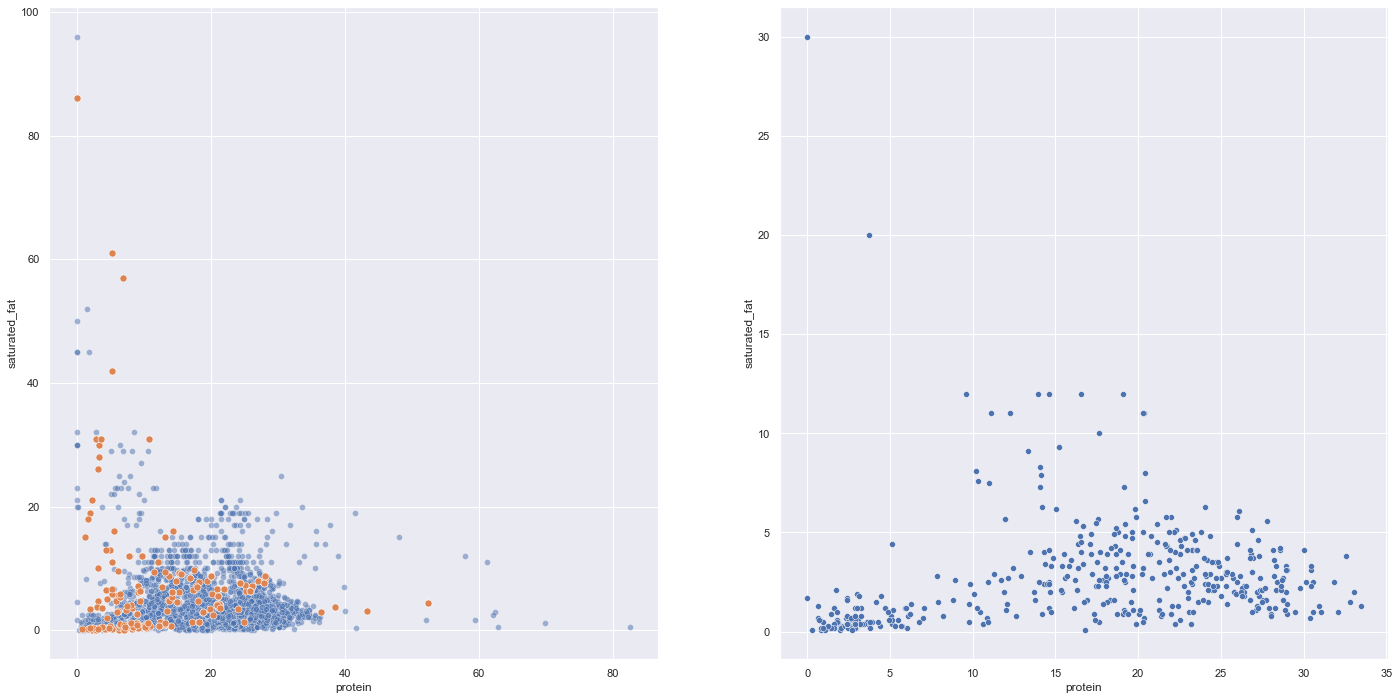

In [147]:
sns.set_theme()

x = "protein"
y = "saturated_fat"

#plt.figure(figsize = (14, 14))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 12))

sns.scatterplot(data = test3[test3["veg"] == False], x = x, y = y, alpha = .5, ax = ax1)
sns.scatterplot(data = test3[test3["veg"] == True], x = x, y = y, s = 50, ax = ax1)

food = "chicken"

sns.scatterplot(data = test3[test3["veg_or_an"] == food], x = x, y = y, ax = ax2)

In [133]:
test3.columns

Index(['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid',
       'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose', 'fat', 'saturated_fatty_acids',
       'monounsaturated_fatty_acids

<AxesSubplot:xlabel='cholesterol'>

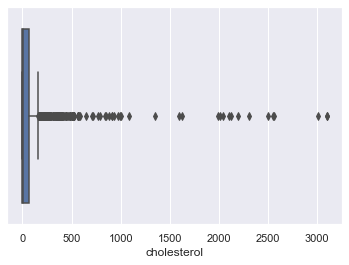

In [148]:
sns.boxplot(x = "cholesterol", data = test)

In [150]:
test["saturated_fat"].isna().sum()

1590

In [153]:
test.columns

Index(['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid',
       'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose', 'fat', 'saturated_fatty_acids',
       'monounsaturated_fatty_acids

In [4]:
daily_intake_nutrients = ["Protein (g)", "Water\n(g)", "Fiber, total dietary (g)", "Vitamin A, RAE (mcg_RAE)", "Thiamin (mg)", "Riboflavin (mg)", "Niacin (mg)", "Vitamin B-6 (mg)", "Vitamin B-12 (mcg)",  "Vitamin B-12, added\n(mcg)", "Folate, total (mcg)", "Vitamin C (mg)", "Calcium (mg)", "Iron\n(mg)", "Magnesium (mg)", "Potassium (mg)", "Sodium (mg)", "Zinc\n(mg)"]

additional_nutrients = ["Energy (kcal)", "Total Fat (g)", "Fatty acids, total saturated (g)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Cholesterol (mg)", "Vitamin D (D2 + D3) (mcg)"]

support_columns = ["Main food description", "WWEIA Category number", "WWEIA Category description"]

nutrients = md.key_nutrients()
nutrients

['protein',
 'water',
 'fiber',
 'vitamin_a',
 'thiamin',
 'riboflavin',
 'niacin',
 'vitamin_b6',
 'vitamin_b12',
 'folate',
 'vitamin_c',
 'calcium',
 'irom',
 'magnesium',
 'potassium',
 'sodium',
 'zink']

In [ ]:
['Dips, gravies, other sauces', 'Ice cream and frozen dairy desserts', 'Milk shakes and other dairy drinks', 'Formula, ready-to-feed',
       'Formula, prepared from powder',
       'Formula, prepared from concentrate',
       'Not included in a food category', 'Cream and cream substitutes', 'Diet soft drinks', 'Flavored or carbonated water',
       'Other diet drinks', 'Beer', 'Liquor and cocktails', 'Wine',
       'Tap water', 'Bottled water', 'Enhanced or fortified water',
       'Baby water', 'Nutritional beverages',
       'Protein and nutritional powders', 'Sport and energy drinks',
       'Diet sport and energy drinks']